In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [4]:
print(os.popen('ls ../data').read())

88_mu015_nsweeps_20_2021-06-10-11-42-07
88_mu015_nsweeps_20_2021-06-10-12-14-12



In [5]:
#path='/home/juan/Programs/ALF/pyALF/Scripts/ALF_data'
Options=['SpinZ_tauJ','SpinXY_tauJ','SpinT_tauJ','Green_tauJ','Den_tauJ','Current_tauJ']
Options2=['Kin_scalJ','Ener_scalJ','Kin_X_scalJ','Part_scalJ', 'Pot_scalJ']
RK=['R','K']
LATSZ=[4,6,8,10]
BETASZ=[6,8,10]
path_pr='/Users/jfmv/Documents/Proyectos/QMC_tests/H_current_attractive/data/'
#path_pr='/home/juan/Documents/Projects/QMC_tests/H_current_attractive/data/'
diri=input()
print(diri[:-19])
path_pr=path_pr+diri+'/'+diri[:-19]
Nsize=4


88_mu015_nsweeps_20_2021-06-10-12-14-12
88_mu015_nsweeps_20_


-0.665559 0.00106 1.0 0.0
Real... 6 x 6 .... beta= 4


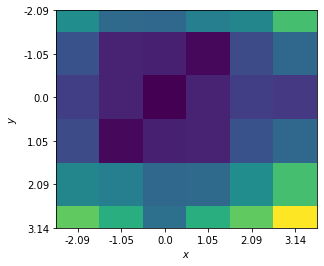

-0.671953 0.006085 1.0 0.0
Real... 6 x 6 .... beta= 6


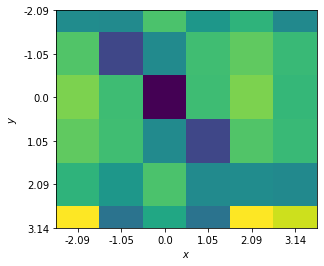

-0.674 0.002698 1.0 0.0
Real... 6 x 6 .... beta= 8


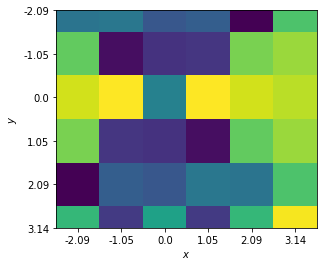

-0.670909 0.006436 1.0 0.0
Real... 6 x 6 .... beta= 10


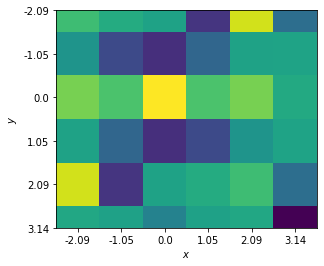

-0.665747 0.001876 1.0 0.0
Real... 8 x 8 .... beta= 4


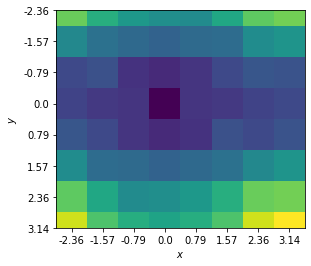

-0.67433 0.002535 1.0 0.0
Real... 8 x 8 .... beta= 6


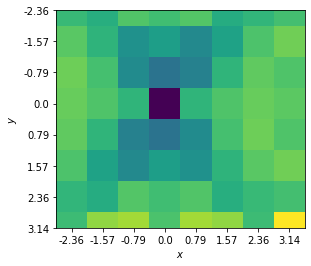

-0.677406 0.001977 1.0 0.0
Real... 8 x 8 .... beta= 8


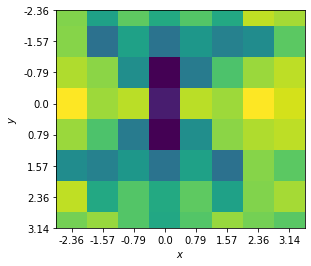

-0.680799 0.00211 1.0 0.0
Real... 8 x 8 .... beta= 10


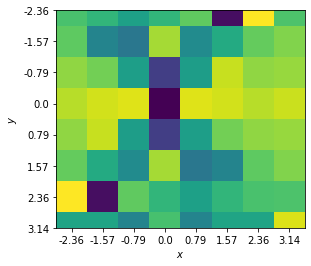

-0.666862 0.002911 1.0 0.0
Real... 10 x 10 .... beta= 4


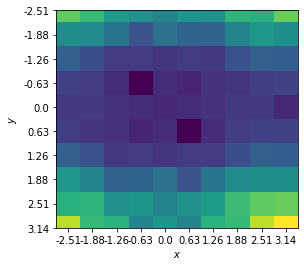

-0.68399 0.005362 1.0 0.0
Real... 10 x 10 .... beta= 6


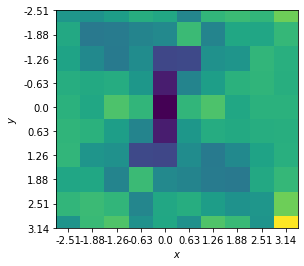

-0.678514 0.002675 1.0 0.0
Real... 10 x 10 .... beta= 8


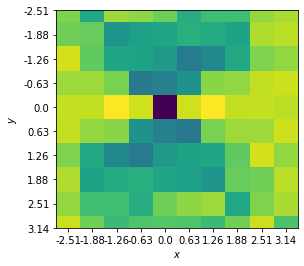

-0.679517 0.001141 1.0 0.0
Real... 10 x 10 .... beta= 10


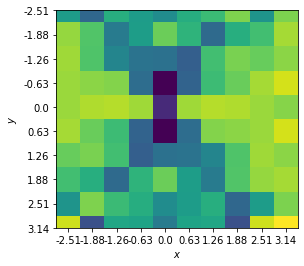

In [7]:


val_list=[]
err_list=[]
sign_list=[]
errsign_list=[]

for BB in BETASZ:
    for i in LATSZ:

        path=path_pr+str(i)+"_"+str(BB)+'/'

        ####################################
        ###################################
        ##################################
        #Scalar observables
        ###############################
        ###############################
        ###############################

        filename=path+Options2[2]
        f=open(filename, 'r')

        lines=[]
        for line in f:
            l=[]
            l=[i for i in (line.strip()).split()]
            lines.append(l)
            #print(line,'s')


        val=float(lines[2][3])
        val_err=float(lines[2][4])
        sign=float(lines[4][3])
        errsign=float(lines[4][4])

        val_list.append(val)
        err_list.append(val_err)
        sign_list.append(sign)
        errsign_list.append(errsign)

        print(val,val_err,sign,errsign)


        ############################
        ###########################
        ############################
        #Current Correlation Function
        ###############################
        #############################
        ###########################

        filename=path+Options[-1]+RK[1]
        f=open(filename, 'r')

        lines=[]
        for line in f:
            l=[]
            l=[float(i) for i in (line.strip()).split()]
            lines.append(l)
            #print(line,'s')

        ##processing coordinates
        xx=np.array(lines)[:,0]
        yy=np.array(lines)[:,1]
        x=list(set(list(np.array(lines)[:,0])))
        y=list(set(list(np.array(lines)[:,1])))
        x.sort()
        y.sort()
        xpl=[round(i,2) for i in x]
        ypl=[round(i,2) for i in y]

        ## getting values if the correlation functions
        real=np.array(lines)[:,2]
        realerr=np.array(lines)[:,3]
        im=np.array(lines)[:,4]
        imerr=np.array(lines)[:,5]

        ###########################
        ###########################
        ##plots
        ##########################
        ##########################

        ###############################
        ####imgaginary part
        """
        print("Imaginary...",i,"x",i)
        NL=int(np.sqrt(np.size(xx)))
        Npl=np.arange(NL)
        imsq=np.reshape(im,[NL,NL])
        imerrsq=np.reshape(imerr,[NL,NL])
        plt.imshow(imsq.T)
        plt.xticks(Npl,xpl)
        plt.yticks(Npl,ypl)
        plt.show()
        """

        """
        i_tr=int(NL/2 -1)
        print('kx...',xpl[i_tr])
        plt.errorbar(ypl,imsq[i_tr,:],imerrsq[i_tr,:], fmt='o')
        plt.show()

        j_tr=int(NL/2 -1)
        print('ky...',ypl[j_tr])
        plt.errorbar(xpl,imsq[:,j_tr],imerrsq[:,j_tr], fmt='o')
        plt.show()
        """
        ###############################
        #real part
        NL=int(np.sqrt(np.size(xx)))
        print("Real...",NL,"x",NL, ".... beta=",i)

        Npl=np.arange(NL)
        realsq=np.reshape(real,[NL,NL])
        realerrsq=np.reshape(realerr,[NL,NL])
        plt.imshow(realsq.T)
        plt.xticks(Npl,xpl)
        plt.yticks(Npl,ypl)
        plt.xlabel(r"$x$")
        plt.ylabel(r"$y$")
        plt.show()

        """
        i_tr=int(NL/2 -1)
        print('kx...',xpl[i_tr])
        plt.errorbar(ypl,realsq[i_tr,:],realerrsq[i_tr,:], fmt='o')
        plt.errorbar(0,-val, val_err, fmt='o')
        plt.show()

        j_tr=int(NL/2 -1)
        print('ky...',ypl[j_tr])
        plt.errorbar(xpl,realsq[:,j_tr],realerrsq[:,j_tr], fmt='o')
        plt.errorbar(0,-val, val_err, fmt='o')
        plt.show()
        """




-0.665559 0.00106 1.0 0.0
Real... 10 x 10 ...beta= 6
kx... 0.0
-0.671953 0.006085 1.0 0.0
Real... 6 x 6 ...beta= 6
kx... 0.0
-0.674 0.002698 1.0 0.0
Real... 6 x 6 ...beta= 6
kx... 0.0
-0.670909 0.006436 1.0 0.0
Real... 6 x 6 ...beta= 6
kx... 0.0


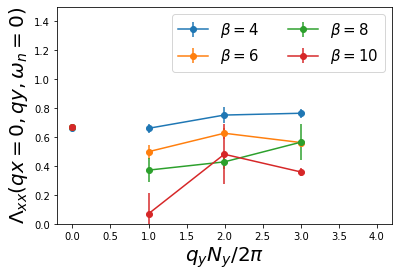

-0.665747 0.001876 1.0 0.0
Real... 6 x 6 ...beta= 8
kx... 0.0
-0.67433 0.002535 1.0 0.0
Real... 8 x 8 ...beta= 8
kx... 0.0
-0.677406 0.001977 1.0 0.0
Real... 8 x 8 ...beta= 8
kx... 0.0
-0.680799 0.00211 1.0 0.0
Real... 8 x 8 ...beta= 8
kx... 0.0


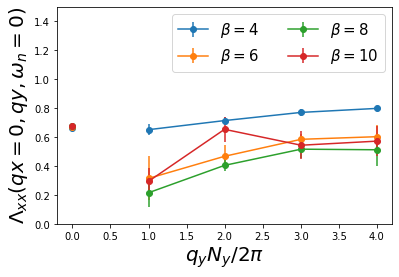

-0.666862 0.002911 1.0 0.0
Real... 8 x 8 ...beta= 10
kx... 0.0
-0.68399 0.005362 1.0 0.0
Real... 10 x 10 ...beta= 10
kx... 0.0
-0.678514 0.002675 1.0 0.0
Real... 10 x 10 ...beta= 10
kx... 0.0
-0.679517 0.001141 1.0 0.0
Real... 10 x 10 ...beta= 10
kx... 0.0


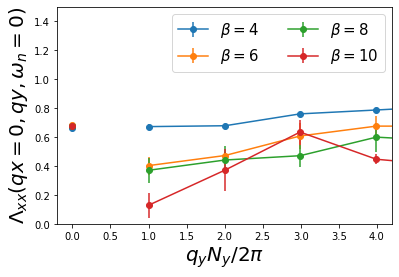

In [9]:


val_list=[]
err_list=[]
sign_list=[]
errsign_list=[]
rhos=[]
rhoerr=[]
BBet=[]
for BB in BETASZ:
    for i in LATSZ:

        path=path_pr+str(i)+"_"+str(BB)+'/'
    
        ####################################
        ###################################
        ##################################
        #Scalar observables
        ###############################
        ###############################
        ###############################

        filename=path+Options2[2]
        f=open(filename, 'r')

        lines=[]
        for line in f:
            l=[]
            l=[i for i in (line.strip()).split()]
            lines.append(l)
            #print(line,'s')


        val=float(lines[2][3])
        val_err=float(lines[2][4])
        sign=float(lines[4][3])
        errsign=float(lines[4][4])

        val_list.append(val)
        err_list.append(val_err)
        sign_list.append(sign)
        errsign_list.append(errsign)

        print(val,val_err,sign,errsign)


        ############################
        ###########################
        ############################
        #Current Correlation Function
        ###############################
        #############################
        ###########################

        filename=path+Options[-1]+RK[1]
        f=open(filename, 'r')

        lines=[]
        for line in f:
            l=[]
            l=[float(i) for i in (line.strip()).split()]
            lines.append(l)
            #print(line,'s')

        ##processing coordinates
        xx=np.array(lines)[:,0]
        yy=np.array(lines)[:,1]
        x=list(set(list(np.array(lines)[:,0])))
        y=list(set(list(np.array(lines)[:,1])))
        x.sort()
        y.sort()
        xpl=[round(i,2) for i in x]
        ypl=[round(i,2) for i in y]

        ## getting values if the correlation functions
        real=np.array(lines)[:,2]
        realerr=np.array(lines)[:,3]
        im=np.array(lines)[:,4]
        imerr=np.array(lines)[:,5]

        ###########################
        ###########################
        ##plots
        ##########################
        ##########################


        ###############################
        #real part
        print("Real...",NL,"x",NL,"...beta=",BB)
        NL=int(np.sqrt(np.size(xx)))
        Npl=np.arange(NL)
        realsq=np.reshape(real,[NL,NL])
        realerrsq=np.reshape(realerr,[NL,NL])
        #plt.imshow(realsq.T)
        #plt.xticks(Npl,xpl)
        #plt.yticks(Npl,ypl)
        #plt.xlabel(r"$x$")
        #plt.ylabel(r"$y$")
        #plt.show()

        init=int(NL/2 )
        i_tr=int(NL/2 -1)
        print('kx...',xpl[i_tr])
        #realsq[i_tr,init]=-val
        #realerrsq[i_tr,init]=val_err
        plt.errorbar(np.array(ypl[init:])*NL/(2*np.pi),realsq[i_tr,init:],realerrsq[i_tr,init:], fmt='o-', label=r"$\beta=$"+str(i))
        #plt.errorbar(0,-val, val_err, fmt='o')
        plt.scatter(ypl[init-1],-val)
        rhos.append(-val-realsq[i_tr,init])
        rhoerr.append(np.sqrt(val_err**2 +realerrsq[i_tr,init]**2))
        
    plt.ylim([0,1.5])
    plt.legend(fontsize=15,ncol=2)
    plt.xlim([-0.2,4.2])
    plt.xlabel(r"$q_y N_y /2\pi$", size=20)
    plt.ylabel(r"$\Lambda_{xx}(qx=0,qy,\omega_n =0)$", size=20)
    plt.show()

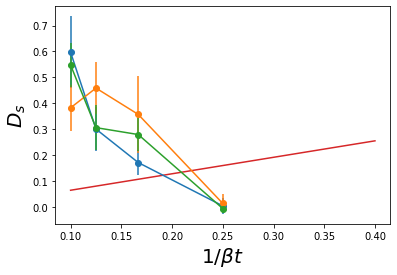

In [22]:


plt.errorbar(1/np.array(LATSZ),rhos[:4], rhoerr[:4] , fmt='o-', label=r"$L=$"+str(6))
plt.xlabel(r"$1/\beta t$", size=20)
plt.ylabel(r"$ D_s$", size=20)

plt.errorbar(1/np.array(LATSZ),rhos[4:8], rhoerr[4:8] , fmt='o-', label=r"$L=$"+str(8))
plt.xlabel(r"$1/\beta t$", size=20)
plt.ylabel(r"$ D_s$", size=20)

plt.errorbar(1/np.array(LATSZ),rhos[8:12], rhoerr[8:12] , fmt='o-', label=r"$L=$"+str(10))
plt.xlabel(r"$1/\beta t$", size=20)
plt.ylabel(r"$ D_s$", size=20)

T=np.linspace(0.1,0.4,100)
plt.plot(T,2*T/np.pi, label=r"$2T/\pi$")



-0.622954 0.004098 1.0 0.0
Real... 8 x 8
ky... 0.0
-0.665747 0.001876 1.0 0.0
Real... 8 x 8
ky... 0.0
-0.67433 0.002535 1.0 0.0
Real... 8 x 8
ky... 0.0
-0.677406 0.001977 1.0 0.0
Real... 8 x 8
ky... 0.0
-0.680799 0.00211 1.0 0.0
Real... 8 x 8
ky... 0.0


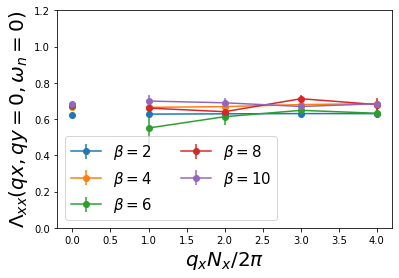

In [15]:


val_list=[]
err_list=[]
sign_list=[]
errsign_list=[]

for i in LATSZ:
    
    path=path_pr+str(i)+'/'
    
    ####################################
    ###################################
    ##################################
    #Scalar observables
    ###############################
    ###############################
    ###############################
    
    filename=path+Options2[2]
    f=open(filename, 'r')

    lines=[]
    for line in f:
        l=[]
        l=[i for i in (line.strip()).split()]
        lines.append(l)
        #print(line,'s')
    
    
    val=float(lines[2][3])
    val_err=float(lines[2][4])
    sign=float(lines[4][3])
    errsign=float(lines[4][4])
    
    val_list.append(val)
    err_list.append(val_err)
    sign_list.append(sign)
    errsign_list.append(errsign)

    print(val,val_err,sign,errsign)
    
    
    ############################
    ###########################
    ############################
    #Current Correlation Function
    ###############################
    #############################
    ###########################
    
    filename=path+Options[-1]+RK[1]
    f=open(filename, 'r')

    lines=[]
    for line in f:
        l=[]
        l=[float(i) for i in (line.strip()).split()]
        lines.append(l)
        #print(line,'s')

    ##processing coordinates
    xx=np.array(lines)[:,0]
    yy=np.array(lines)[:,1]
    x=list(set(list(np.array(lines)[:,0])))
    y=list(set(list(np.array(lines)[:,1])))
    x.sort()
    y.sort()
    xpl=[round(i,2) for i in x]
    ypl=[round(i,2) for i in y]

    ## getting values if the correlation functions
    real=np.array(lines)[:,2]
    realerr=np.array(lines)[:,3]
    im=np.array(lines)[:,4]
    imerr=np.array(lines)[:,5]
    
    ###########################
    ###########################
    ##plots
    ##########################
    ##########################
    

    ###############################
    #real part
    print("Real...",NL,"x",NL)
    NL=int(np.sqrt(np.size(xx)))
    Npl=np.arange(NL)
    realsq=np.reshape(real,[NL,NL])
    realerrsq=np.reshape(realerr,[NL,NL])
    #plt.imshow(realsq.T)
    #plt.xticks(Npl,xpl)
    #plt.yticks(Npl,ypl)
    #plt.xlabel(r"$x$")
    #plt.ylabel(r"$y$")
    #plt.show()
    
    init=int(NL/2 )
    j_tr=int(NL/2 -1)
    print('ky...',ypl[i_tr])
    #realsq[i_tr,init]=-val
    #realerrsq[i_tr,init]=val_err
    plt.errorbar(np.array(xpl[init:])*NL/(2*np.pi),realsq[init:,j_tr],realerrsq[init:,j_tr], fmt='o-', label=r"$\beta=$"+str(i))
    #plt.errorbar(0,-val, val_err, fmt='o')
    plt.scatter(0,-val)
plt.ylim([0,1.2])
plt.legend(fontsize=15, ncol=2)
plt.xlim([-0.2,4.2])
plt.xlabel(r"$q_x N_x /2\pi$", size=20)
plt.ylabel(r"$\Lambda_{xx}(qx,qy=0,\omega_n =0)$", size=20)
plt.show()
